In [211]:
import random as rand
import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

# Normal distribution

\begin{equation*}
f(x \; | \; \mu, \sigma^2) = \frac{1}{\sqrt{2\sigma^2\pi} } \; e^{ -\frac{(x-\mu)^2}{2\sigma^2} }
\end{equation*}
Where $\mu$ - expectation of the distribution, $\sigma^2$ - variance

In [212]:
def normal_density(x, mu=0, sigma=1):
    return 1 / math.sqrt(2 * sigma**2 * math.pi) * math.exp(- (x - mu)**2 / 2 * sigma*sigma)

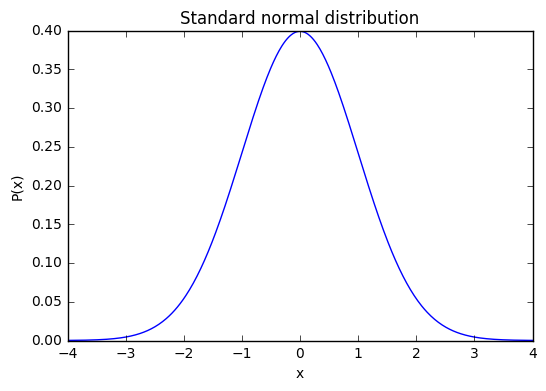

In [213]:
size = 500
normal_dens = np.zeros(size)
x_axis = np.linspace(-4, 4, num=size)
for i in range(size):
    normal_dens[i] = normal_density(x_axis[i])
plt.plot(x_axis, normal_dens)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Standard normal distribution')
plt.show()

## Central limit theorem

In [214]:
def normal_variate(mu=0, sigma=1):
    uniform_variates = 0
    for uniform_i in range(12):
        uniform_variates += rand.random()
    return mu + sigma * (uniform_variates - 6)
    

def normal_variates(size, mu=0, sigma=1):    
    normal_variates = np.zeros(size)
    for normal_i in range(size):
        normal_variates[normal_i] = normal_variate(mu, sigma)
    return normal_variates

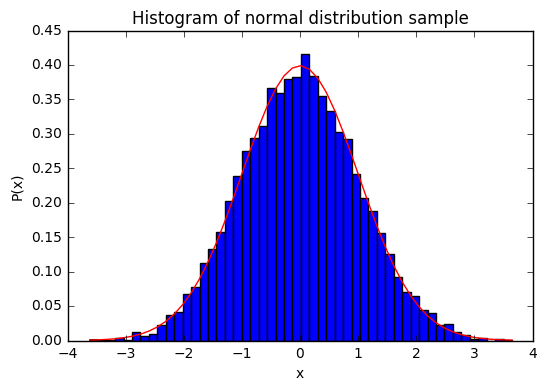

In [215]:
sample_size = 10000
mu, sigma = 0, 1
norm_sample = normal_variates(sample_size)

num_bins = 50
n, bins, patches = plt.hist(norm_sample, num_bins, normed=True)
# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, color='r')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Histogram of normal distribution sample')
plt.show()

# non-standardized Student's t-distribution

density:
\begin{equation*}
p(x\mid \nu,\mu,\sigma^2) = \frac{\Gamma(\frac{\nu + 1}{2})}{\Gamma(\frac{\nu}{2})\sqrt{\pi\nu\sigma^2}} \left(1+\frac{1}{\nu}\frac{(x-\mu)^2}{\sigma^2}\right)^{-\frac{\nu+1}{2}}
\end{equation*}
<p>
Where $\nu$ - degrees of freedom, $\mu$ - location parameter, $\sigma^2$ - squared scale parameter, and $\Gamma$ is the gamma function:
<p>
\begin{equation*}
\Gamma(n) = (n-1)!
\end{equation*}

In [216]:
def t_distribution(x, nu, mu=0, sigma=1):
    return math.gamma((nu + 1) / 2) / (math.gamma(nu / 2) * math.sqrt(math.pi * nu) * sigma) * \
    (1 + 1 / nu * (x - mu)**2 / sigma**2)**(-(nu + 1) / 2)

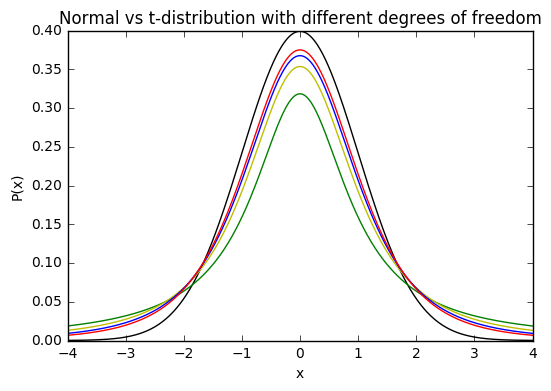

In [217]:
size = 500
normal_dens = np.zeros(size)
t_dens1 = np.zeros(size)
t_dens2 = np.zeros(size)
t_dens3 = np.zeros(size)
t_dens4 = np.zeros(size)
x_axis = np.linspace(-4, 4, num=size)
for i in range(size):
    normal_dens[i] = normal_density(x_axis[i])
    t_dens1[i] = t_distribution(x_axis[i], 1)
    t_dens2[i] = t_distribution(x_axis[i], 2)
    t_dens3[i] = t_distribution(x_axis[i], 3)
    t_dens4[i] = t_distribution(x_axis[i], 4)
plt.plot(x_axis, normal_dens, 'black')
plt.plot(x_axis, t_dens1, 'g')
plt.plot(x_axis, t_dens2, 'y')
plt.plot(x_axis, t_dens3, 'b')
plt.plot(x_axis, t_dens4, 'r')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Normal vs t-distribution with different degrees of freedom')
plt.show()

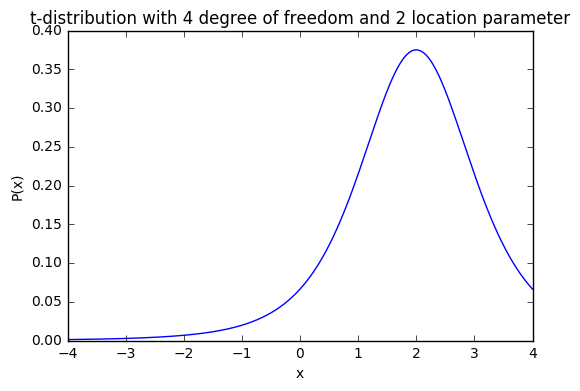

In [218]:
def draw_t_distrib(degrees_of_freedom, location_parameter, color='b'):
    size = 500
    t_dens = np.zeros(size)
    x_axis = np.linspace(-4, 4, num=size)
    for i in range(size):
        t_dens[i] = t_distribution(x_axis[i], degrees_of_freedom, mu=location_parameter)
    plt.plot(x_axis, t_dens, color)

draw_t_distrib(4, 2)
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('t-distribution with 4 degree of freedom and 2 location parameter')
plt.show()

## t-distribution from sampling

\begin{equation*}
t=\frac{ \bar X - \mu} {S/\sqrt n}
\end{equation*}
<p>
Where $\bar X$ - sample mean of $X_n$ distributed as normal, $\mu$ - expectation of the normal distribution, $S^2$ - sample variance and n - 1 degrees of freedom.
<p>
\begin{equation*}
\bar X = \frac 1 n \sum_{i=1}^n X_i
\end{equation*}
<p>
\begin{equation*}
S^2 = \frac 1 {n-1} \sum_{i=1}^n (X_i - \bar X)^2
\end{equation*}
<p>
And non-standardized
\begin{equation*}
t^* = \mu + \sigma t
\end{equation*}
$\mu$ - location parameter, $\sigma$ - scale parameter

In [219]:
def mean(x):
    return 1 / x.size * np.sum(x)

def sample_variance(x):
    return 1 / (x.size - 1) * np.sum((x - mean(x))**2)

def t_variate(x, mu=0, location_parameter=0, scale_parameter=1):
    return ((mean(x) - mu) / (math.sqrt(sample_variance(x)) / math.sqrt(x.size))) * \
    scale_parameter + location_parameter

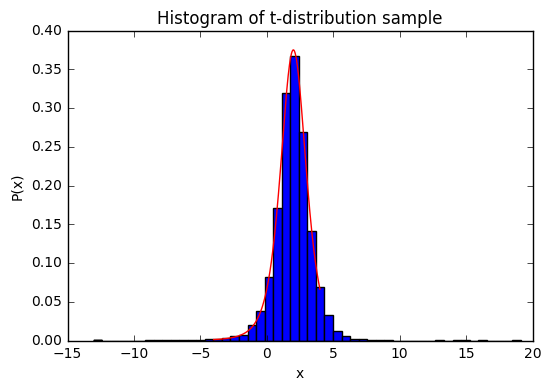

In [221]:
sample_size = 10000
mu, sigma = 0, 1
degrees_of_freedom = 4
location_parameter = 2
t_sample = np.zeros(sample_size)
for i in range(sample_size):
    norm_vars = normal_variates(degrees_of_freedom + 1, mu, sigma)
    t_sample[i] = t_variate(norm_vars, mu, location_parameter)

num_bins = 50
n, bins, patches = plt.hist(t_sample, num_bins, normed=True)
draw_t_distrib(degrees_of_freedom, location_parameter, 'r')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Histogram of t-distribution sample')
plt.show()